In [ ]:
#Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

predisaster_paths = []
postdisaster_paths = []
predisaster_masks_paths = []
postdisaster_masks_paths = []



predisaster_main_path = '/content/drive/MyDrive/train/train/images'
postdisaster_main_path = '/content/drive/MyDrive/train/images_post'
predisaster_masks_main_path = '/content/drive/MyDrive/train/train/masks'
postdisaster_masks_main_path = '/content/drive/MyDrive/train/multiclass_segmentation_labels'



for path in os.listdir(predisaster_main_path):
  predisaster_paths.append(path)

for path in os.listdir(postdisaster_main_path):
  postdisaster_paths.append(path)

for path in os.listdir(predisaster_masks_main_path):
  predisaster_masks_paths.append(path)

for path in os.listdir(postdisaster_masks_main_path):
  postdisaster_masks_paths.append(path)







In [ ]:
def apply_colormap(mask):
    # Define a color map: you can change these colors as needed
    colormap = {
        0: [0, 0, 0],       # Black for 0
        1: [0, 255, 0],       # green for 1
        2: [255,255,0],     # Red for 2
        3: [255, 165, 0],     # Green for 3
        4: [255, 0, 0]      # Blue for 4
    }

    # Create an RGB image with the same size as the mask
    colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3))

    # Apply the color mapping
    for value, color in colormap.items():
        colored_mask[mask == value] = color

    return colored_mask

In [ ]:
#Sort all the lists
predisaster_paths.sort()
postdisaster_paths.sort()
predisaster_masks_paths.sort()
postdisaster_masks_paths.sort()

In [ ]:
import matplotlib.pyplot as plt

prediction = '/content/drive/MyDrive/test_set/targets/test_damage_hurricane-florence-00000004_target.png'
plt.imshow(apply_colormap(cv2.imread(target, cv2.IMREAD_GRAYSCALE)))
plt.show()


AttributeError: ignored

In [ ]:
print(predisaster_paths[1325])

nepal-flooding_00000408_pre_disaster.tif


nepal-flooding_00000408_pre_disaster.tif


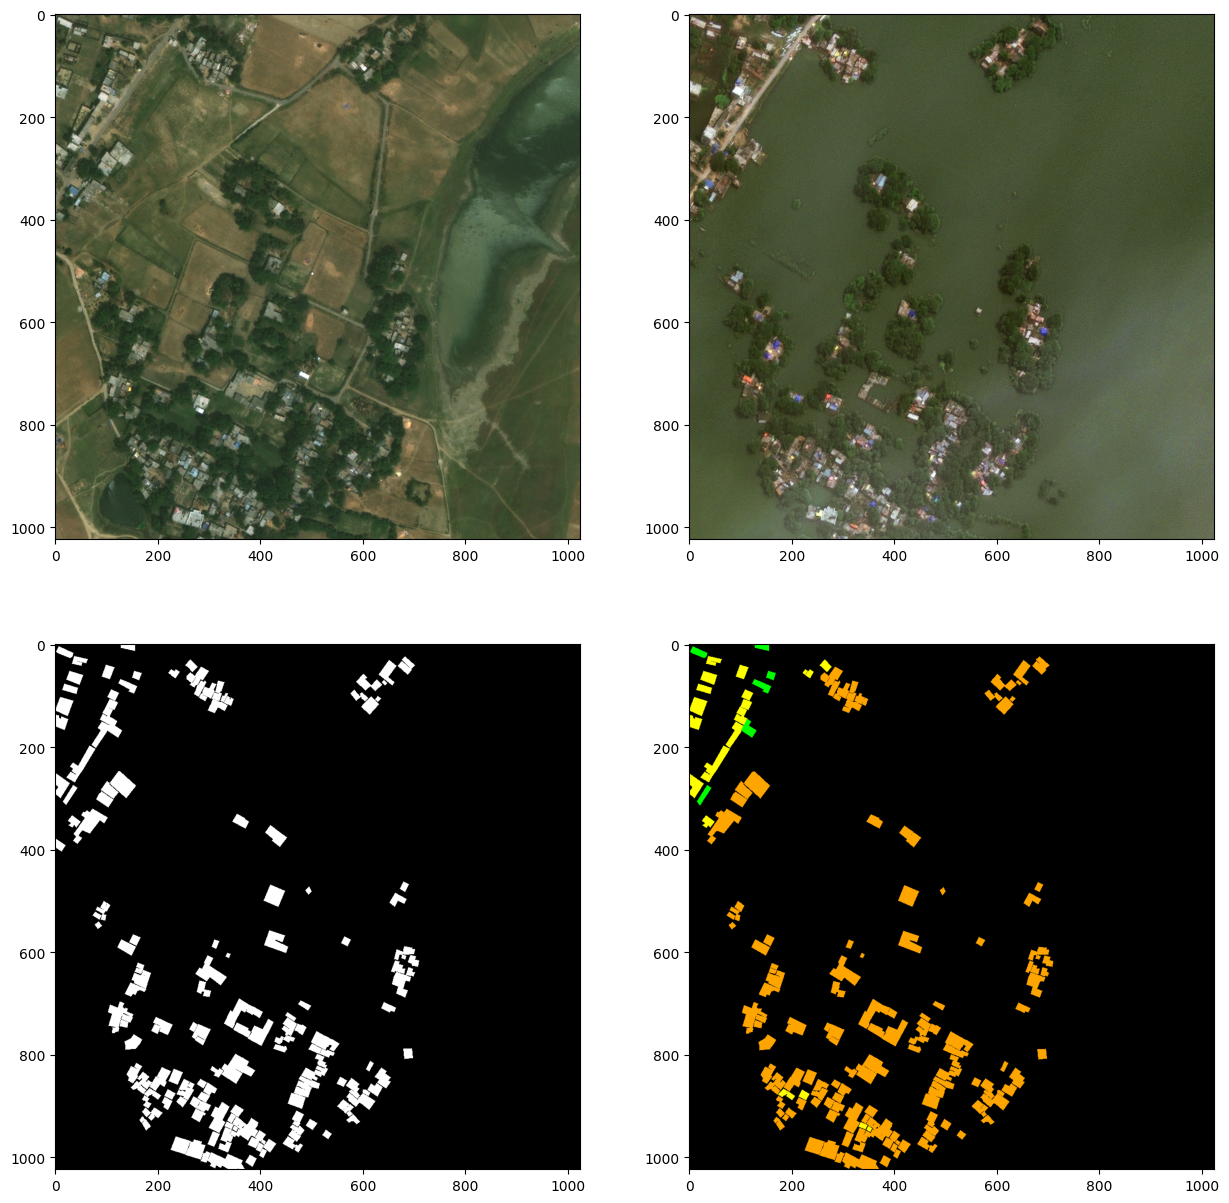

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import tifffile
import matplotlib.pyplot as plt
import numpy as np
idx = 1325

predisaster_img = tifffile.imread(predisaster_main_path + '/' + predisaster_paths[idx])
postdisaster_img = tifffile.imread(postdisaster_main_path + '/' + postdisaster_paths[idx])
predisaster_mask = tifffile.imread(predisaster_masks_main_path + '/' + predisaster_masks_paths[idx])
postdisaster_mask = cv2.imread(postdisaster_masks_main_path + '/' + postdisaster_masks_paths[idx], cv2.IMREAD_GRAYSCALE)
print(predisaster_paths[idx])
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.imshow(predisaster_img)
plt.subplot(2, 2, 2)
plt.imshow(postdisaster_img)
plt.subplot(2, 2, 3)
plt.imshow(predisaster_mask)
plt.subplot(2, 2, 4)
plt.imshow(apply_colormap(postdisaster_mask))
plt.show()



In [ ]:
import tensorflow as tf
from keras.models import load_model

# Paths to your model files
localizer_model_path = '/content/drive/MyDrive/Good model/building_localizer.h5'
classifier_model_path = '/content/drive/MyDrive/Good model/building_classifier_1.h5'

# Load the models
localizer_model = load_model(localizer_model_path)
classifier_model = load_model(classifier_model_path)

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np
import cv2
import tifffile
from google.colab.patches import cv2_imshow
# Full path to the specific image
for i in test_localization_image_paths:
  base_name = i


  full_path = images_path + '/' +i
  image = tifffile.imread(full_path)
  image = image / 255.0
  image = np.expand_dims(image, axis=0)
  predicted_mask = localizer_model.predict(image)
  mask_2d = np.squeeze(predicted_mask, axis=(0, -1))

  _, mask_2d = cv2.threshold(mask_2d, 0.71, 1, cv2.THRESH_BINARY)
  mask_2d = (mask_2d * 255).astype(np.uint8)
  new_name = 'test_localization_'+base_name[:-16]+'prediction.png'
  mask_path = "/content/drive/MyDrive/test_set/results/" + new_name  # Specify your path here

# `predicted_mask` is now the mask predicted by your model for the specified image


Localization F1 Score

In [ ]:
import os
import cv2
import numpy as np
from sklearn.metrics import f1_score

def load_and_process_mask(file_path):
    """Load the mask using cv2 and convert it to a binary format."""
    mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    mask = mask / 255.0  # Normalize to range [0, 1]
    return mask

def calculate_f1_scores(pred_dir, target_dir):
    """Calculate F1 scores for all the samples in the given directories."""
    f1_scores = []

    for file_name in os.listdir(pred_dir):
        if file_name.endswith('_prediction.png') and 'localization' in file_name:
            # Extracting the sample name from the filename
            sample_name = file_name.replace('test_localization_', '').replace('_prediction.png', '')

            # Constructing file paths
            pred_mask_path = os.path.join(pred_dir, file_name)
            target_mask_path = os.path.join(target_dir, f"test_localization_{sample_name}_target.png")

            # Load and process masks
            pred_mask = load_and_process_mask(pred_mask_path)
            target_mask = load_and_process_mask(target_mask_path)

            # Flatten the masks to compare pixel-wise
            pred_mask_flat = pred_mask.flatten()
            target_mask_flat = target_mask.flatten()


            score = f1_score(target_mask_flat, pred_mask_flat, zero_division=1)
            f1_scores.append(score)

    # average F1 score
    avg_f1_score = np.mean(f1_scores)
    return avg_f1_score

pred_dir = "/content/drive/MyDrive/test_set/results"
target_dir = '/content/drive/MyDrive/test_set/targets'


average_f1_score = calculate_f1_scores(pred_dir, target_dir)
print(f"Average F1 Score: {average_f1_score}")


Average F1 Score: 0.9467428768027343


In [ ]:
# Group json files by disaster
from pathlib import Path
import json
from random import randint
from collections import Counter
from collections import defaultdict

def get_disaster_dict(labels_generator):
    disaster_dict = defaultdict(list)
    for label in labels_generator:
        disaster_type = label.name.split('_')[0]
        disaster_dict[disaster_type].append(str(label))
    return disaster_dict

def read_label(label_path):
    with open(label_path) as json_file:
        image_json = json.load(json_file)
        return image_json

def get_damage_type(properties):
    if 'subtype' in properties:
        return properties['subtype']
    else:
        return 'no-damage'

In [ ]:
import tifffile
from shapely.wkt import loads
import numpy as np
from google.colab.patches import cv2_imshow
from PIL import Image, ImageDraw
labels_generator = Path('/content/drive/MyDrive/test_set/labels').rglob(pattern=f'*post_*.json')
disaster_dict = get_disaster_dict(labels_generator)
keep_these = ['hurricane-harvey', 'hurricane-florence', 'midwest-flooding']
# Assuming disaster_dict is your original dictionary and keep_these is your list of keys to keep
disaster_dict = {key: disaster_dict[key] for key in keep_these if key in disaster_dict}

def get_bounding_box(wkt_polygon, margin=5):
    """
    Calculate the bounding box for a given polygon and expand it by the specified margin.
    :param wkt_polygon: WKT representation of the polygon.
    :param margin: Amount by which to expand the bounding box on each side.
    :return: Coordinates of the expanded bounding box.
    """
    polygon = loads(wkt_polygon)

    minx, miny, maxx, maxy = polygon.bounds
    center_x = (minx + maxx) / 2
    center_y = (miny + maxy) / 2
    minx = center_x - 75
    maxx = center_x + 75
    miny = center_y - 75
    maxy = center_y + 75
    # Get the Center of the the box. Return b
    # Expand the bounding box
    return [(minx, miny), (maxx, maxy)]

def create_directory(path):
    """Create a directory if it does not exist."""
    if not os.path.exists(path):
        os.makedirs(path)

def predict_cropped_building(image, bbox):
    """Crop and save the image based on the bounding box."""
    cropped_image = image.crop((bbox[0][0], bbox[0][1], bbox[1][0], bbox[1][1]))

    img_array = np.array(cropped_image)
    img_array = np.expand_dims(img_array, axis=0)
    prediction = classifier_model.predict(img_array, verbose=0)
    return np.argmax(prediction) + 1

# Process each image and crop the buildings
for i in disaster_dict.keys():
    disaster_labels = disaster_dict[i]
    for j in disaster_labels:
        disaster = read_label(j)
        img_path = j.replace('labels', 'images').replace('json', 'tif')
        image = tifffile.imread(img_path)
        image_pil = Image.fromarray(np.array(image, dtype=np.uint8))

        wkt_polygons = []
        for coord in disaster['features']['xy']:
            damage = get_damage_type(coord['properties'])
            wkt_polygons.append((damage, coord['wkt']))

        mask = Image.new("L", image_pil.size, (0))
        draw = ImageDraw.Draw(mask)

        for damage, wkt_polygon in wkt_polygons:
            bbox = get_bounding_box(wkt_polygon)
            int_class = predict_cropped_building(image_pil, bbox)

            polygon = loads(wkt_polygon)
            exterior_coords = list(polygon.exterior.coords)
            points = [(x, y) for x, y in exterior_coords]

            draw.polygon(points, fill=int(int_class))
        base_name = img_path.replace('/content/drive/MyDrive/test_set/images/', '')
        new_name = 'test_damage_'+base_name.replace('post_disaster.tif','prediction.png')
        mask_path = "/content/drive/MyDrive/test_set/results/" + new_name  # Specify your path here
        cv2.imwrite('/content/sample_data/mask.png', np.array(mask))


In [ ]:
def apply_colormap(mask):
    # Define a color map: you can change these colors as needed
    colormap = {
        0: [0, 0, 0],       # Black for 0
        1: [0, 255, 0],       # green for 1
        2: [255,255,0],     # yellow for 2
        3: [255, 0,0],     # Green for 3
        4: [255, 255, 255]      # white for 4
    }

    # Create an RGB image with the same size as the mask
    colored_mask = np.zeros((mask.shape[0], mask.shape[1], 3), dtype=np.uint8)

    # Apply the color mapping
    for value, color in colormap.items():
        colored_mask[mask == value] = color
    colored_mask = cv2.cvtColor(colored_mask, cv2.COLOR_BGR2RGB)
    return colored_mask

In [ ]:
import matplotlib as plt
import cv2
from google.colab.patches import cv2_imshow



In [ ]:
import matplotlib as plt
import cv2
from google.colab.patches import cv2_imshow

img = tifffile.imread(predisaster_main_path + '/' + predisaster_paths[idx])
img = np.expand_dims(img, axis=0)
img = localizer_model.predict(img)
_, img = cv2.threshold(img, 0.71, 1, cv2.THRESH_BINARY)


print(img.shape)

1/1 [==============================] - 6s 6s/step
(1, 1024)


In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
# Function to convert a contour to WKT polygon string
def contour_to_wkt(contour):
    # Flatten the contour array to ensure it's 2D
    contour = contour.reshape(-1, 2)

    # Check if the contour is closed
    if len(contour) > 0 and not np.array_equal(contour[0], contour[-1]):
        # Add the first point to the end of the contour
        contour = np.vstack([contour, contour[0]])

    # Create WKT polygon string
    points = [tuple(point) for point in contour]
    return "POLYGON ((" + ", ".join(["{} {}".format(x, y) for x, y in points]) + "))"



# Initialize an empty list to store WKT polygons
wkt_polygons = []

# Load the image
img = cv2.imread("/content/img.png")
# Convert to greyscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Find the contours
contours, _ = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# For each contour approximate the curve and
# detect the shapes.
for cnt in contours:
    epsilon = 0.001*cv2.arcLength(cnt, True)
    approx = cv2.approxPolyDP(cnt, epsilon, True)
    # Change the color here to red
    cv2.drawContours(img, [approx], 0, (0, 0, 255), 3)
    # Convert contour to WKT polygon and add to the list
    wkt_polygons.append(contour_to_wkt(approx))




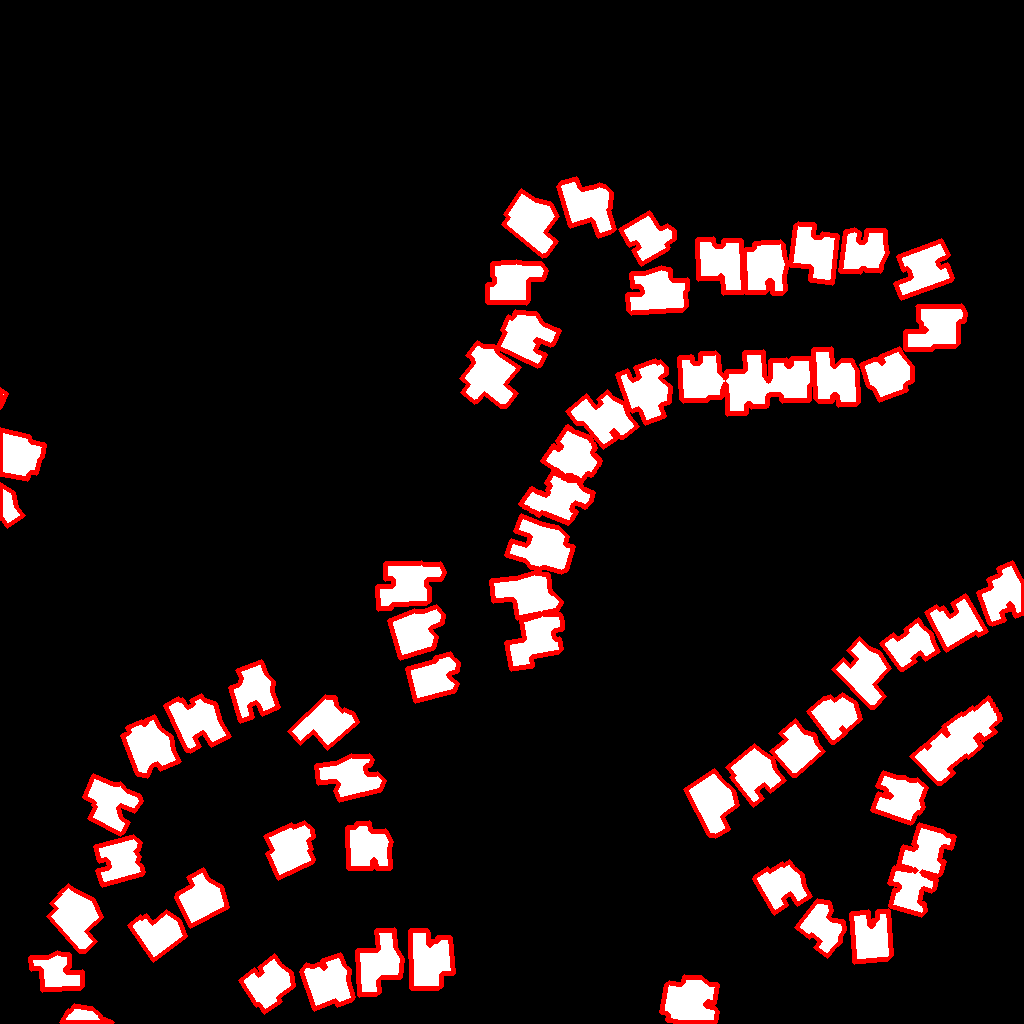

In [ ]:
cv2_imshow(img)

In [ ]:
import tifffile
from shapely.wkt import loads
import shapely.geometry
from shapely.ops import polygonize
from shapely.geometry import Polygon
from PIL import Image, ImageDraw
import os
import tensorflow as tf
from keras.models import load_model
import numpy as np

def get_bounding_box(wkt_polygon, margin=5):


    try:
        polygon = loads(wkt_polygon)
    except Exception as e:
        return None


    minx, miny, maxx, maxy = polygon.bounds
    center_x = (minx + maxx) / 2
    center_y = (miny + maxy) / 2
    minx = center_x - 75
    maxx = center_x + 75
    miny = center_y - 75
    maxy = center_y + 75
    # Get the Center of the the box. Return b
    # Expand the bounding box
    return [(minx, miny), (maxx, maxy)]


img = tifffile.imread(postdisaster_main_path + '/' + postdisaster_paths[idx])
normalized_image = ((img - img.min()) / (img.max() - img.min()) * 255).astype(np.uint8)

# Convert the NumPy array to a Pillow Image
img = Image.fromarray(normalized_image)
img_for_crop = Image.fromarray(normalized_image)
classifier = load_model('/content/drive/MyDrive/Good model/building_classifier.h5')

def preprocess_image(image, target_size):

    image = image.resize(target_size)
    image_array = np.asarray(image)
    return np.expand_dims(image_array, axis=0)

# Classifier's expected input size
input_size = (150, 150)
class_labels = ["no-damage", "minor damage", "major damage", "destroyed"]
damage_dict = {
        'unc': [0, 0, 0],
        'no-damage': [0, 255, 0],
        'minor damage': [255,255,0],
        'major damage': [255, 165, 0],
        'destroyed': [255, 0, 0]
    }

mask = Image.new("RGB", img.size, (0, 0, 0))
draw = ImageDraw.Draw(mask)

for wkt_polygon in wkt_polygons:

    try:
        polygon = loads(wkt_polygon)
    except Exception as e:
        pass
    bbox = get_bounding_box(wkt_polygon)
    if bbox is not None:
        # Crop and preprocess the image

        cropped_image = img_for_crop.crop((bbox[0][0], bbox[0][1], bbox[1][0], bbox[1][1]))
        cropped_image.save('crop'+str(i)+'.png')
        preprocessed_image = preprocess_image(cropped_image, input_size)

        # Classify the image
        prediction = classifier.predict(preprocessed_image, verbose=None)
        damage_class = class_labels[np.argmax(prediction)]
        color = damage_dict[damage_class]

        # Convert shapely polygon to a list of points
        if isinstance(polygon, Polygon):

            exterior_coords = list(polygon.exterior.coords)
            points = [(x, y) for x, y in exterior_coords]
            draw.polygon(points, fill=tuple(color))
mask.save('mask.png')


In [ ]:
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # Currently, memory growth needs to be the same across GPUs
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
    except RuntimeError as e:
        # Memory growth must be set before GPUs have been initialized
        print(e)


Physical devices cannot be modified after being initialized


In [ ]:
import os
import numpy as np
import tifffile
from PIL import Image, ImageDraw
import tensorflow as tf
from keras.models import load_model
from shapely.wkt import loads
from shapely.geometry import Polygon


# localizer_model = load_model(localizer_model_path)
# classifier_model = load_model(classifier_model_path)
def preprocess_image(image, target_size):

    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize(target_size)
    image_array = np.asarray(image)
    image_array = image_array.astype('float32') / 255.0  # normalize
    return np.expand_dims(image_array, axis=0)


def process_images(predisaster_dir, postdisaster_dir, result_dir):
    for filename in os.listdir(predisaster_dir):
        # Load and preprocess predisaster image
        predisaster_image_path = os.path.join(predisaster_dir, filename)
        predisaster_image = tifffile.imread(predisaster_image_path)
        predisaster_image = predisaster_image / 255.0  # Normalize
        predisaster_image = np.expand_dims(predisaster_image, axis=0)

        # Predict mask
        predicted_mask = localizer_model.predict(predisaster_image)
        pred_mask_binary = (predicted_mask > 0.32).astype(np.uint8)
        pred_mask_binary = np.squeeze(pred_mask_binary)

        # Convert mask to polygons and bounding boxes
        wkt_polygons = mask_to_polygons(pred_mask_binary)

        # Load and preprocess postdisaster image
        filename = filename.replace('pre', 'post')


        postdisaster_image_path = os.path.join(postdisaster_dir, filename)

        postdisaster_image = tifffile.imread(postdisaster_image_path)
        postdisaster_image_normalized = ((postdisaster_image - postdisaster_image.min()) /
                                         (postdisaster_image.max() - postdisaster_image.min()) * 255).astype(np.uint8)
        postdisaster_image_pil = Image.fromarray(postdisaster_image_normalized)

        # Predict damage and create result mask
        result_mask = predict_damage_and_create_mask(postdisaster_image_pil, wkt_polygons)

        # Save result mask
        result_mask.save(os.path.join(result_dir, filename.replace('.tif', '_result.png')))


def mask_to_polygons(mask):
      # Function to convert a contour to WKT polygon string
  def contour_to_wkt(contour):
      # Flatten the contour array to ensure it's 2D
      contour = contour.reshape(-1, 2)

      # Check if the contour is closed
      if len(contour) > 0 and not np.array_equal(contour[0], contour[-1]):
          # Add the first point to the end of the contour
          contour = np.vstack([contour, contour[0]])

      # Create WKT polygon string
      points = [tuple(point) for point in contour]
      return "POLYGON ((" + ", ".join(["{} {}".format(x, y) for x, y in points]) + "))"

  # Initialize an empty list to store WKT polygons
  final_array = np.expand_dims(mask, axis=-1)
  img = tf.keras.preprocessing.image.array_to_img(final_array)
  img.save('/content/img.png')
  wkt_polygons = []
  # Load the image
  img = cv2.imread("/content/img.png")
  # Convert to greyscale
  img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  # Find the contours
  contours, _ = cv2.findContours(img_gray, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

  # For each contour approximate the curve and
  # detect the shapes.
  for cnt in contours:
      epsilon = 0.001*cv2.arcLength(cnt, True)
      approx = cv2.approxPolyDP(cnt, epsilon, True)

      cv2.drawContours(img, [approx], 0, (0, 0, 255), 3)
      # Convert contour to WKT polygon and add to the list
      wkt_polygons.append(contour_to_wkt(approx))
  return wkt_polygons

def predict_damage_and_create_mask(image, wkt_polygons):
    mask = Image.new("RGB", image.size, (0, 0, 0))
    draw = ImageDraw.Draw(mask)
    class_labels = ["no-damage", "minor damage", "major damage", "destroyed"]
    damage_dict = {
        'unc': [0, 0, 0],
        'no-damage': [0, 255, 0],
        'minor damage': [255,255,0],
        'major damage': [255, 0, 0],
        'destroyed': [255, 255, 255]
    }
    for wkt_polygon in wkt_polygons:
      try:
        polygon = loads(wkt_polygon)
      except Exception as e:
          pass
      if bbox is not None:
        # Crop and preprocess the image
        cropped_image = img_for_crop.crop((bbox[0][0], bbox[0][1], bbox[1][0], bbox[1][1]))
        preprocessed_image = preprocess_image(cropped_image, input_size)

        # Classify the image
        prediction = classifier.predict(preprocessed_image, verbose=None)
        damage_class = class_labels[np.argmax(prediction)]
        color = damage_dict[damage_class]
        # Convert shapely polygon to a list of points
        try:
          if isinstance(polygon, Polygon):

              exterior_coords = list(polygon.exterior.coords)
              points = [(x, y) for x, y in exterior_coords]
              draw.polygon(points, fill=tuple(color))
        except Exception as e:
          pass
    return mask

# Example usage
process_images('/content/drive/MyDrive/train/train/images', '/content/drive/MyDrive/train/images_post', '/content/results')


In [ ]:
import cv2
import numpy as np
from PIL import Image, ImageDraw
from shapely.wkt import loads
from shapely.geometry import Polygon
import tensorflow as tf
from keras.models import load_model


# localizer_model = load_model(localizer_model_path)
# classifier_model = load_model(classifier_model_path)

def preprocess_image(image, target_size):
    if image.mode != 'RGB':
        image = image.convert('RGB')
    image = image.resize(target_size)
    image_array = np.asarray(image)
    image_array = image_array.astype('float32') / 255.0  # normalize
    return np.expand_dims(image_array, axis=0)

def mask_to_polygons(mask):
    # Convert a binary mask to WKT polygons
    contours, _ = cv2.findContours(mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    wkt_polygons = []
    for cnt in contours:
        epsilon = 0.001 * cv2.arcLength(cnt, True)
        approx = cv2.approxPolyDP(cnt, epsilon, True)
        if len(approx) > 2:
            polygon = Polygon([(p[0][0], p[0][1]) for p in approx])
            wkt_polygons.append(polygon.wkt)
    return wkt_polygons

def predict_damage_and_create_mask(image, wkt_polygons, classifier, input_size):
    mask = Image.new("RGB", image.size, (0, 0, 0))
    draw = ImageDraw.Draw(mask)
    class_labels = ["no-damage", "minor damage", "major damage", "destroyed"]
    damage_dict = {
        'no-damage': [0, 255, 0],
        'minor damage': [255, 255, 0],
        'major damage': [255, 0, 0],
        'destroyed': [255, 255, 255]
    }

    for wkt_polygon in wkt_polygons:
        polygon = loads(wkt_polygon)
        bbox = polygon.bounds
        if bbox:
            # Crop and preprocess the image
            cropped_image = image.crop((bbox[0], bbox[1], bbox[2], bbox[3]))
            preprocessed_image = preprocess_image(cropped_image, input_size)

            # Classify the image
            prediction = classifier.predict(preprocessed_image, verbose=0)
            damage_class = class_labels[np.argmax(prediction)]
            color = damage_dict[damage_class]
            # Draw polygon on the mask
            draw.polygon(list(polygon.exterior.coords), fill=tuple(color))

    return mask

def process_images(predisaster_dir, postdisaster_dir, result_dir, localizer_model, classifier_model):
    for filename in os.listdir(predisaster_dir):

        predisaster_image_path = os.path.join(predisaster_dir, filename)
        predisaster_image = tifffile.imread(predisaster_image_path)
        predisaster_image_normalized = predisaster_image / 255.0  # Normalize

        # Predict mask
        predicted_mask = localizer_model.predict(np.expand_dims(predisaster_image_normalized, axis=0))
        pred_mask_binary = (predicted_mask > 0.32).astype(np.uint8).squeeze()

        # Convert mask to polygons
        wkt_polygons = mask_to_polygons(pred_mask_binary)

        # Process postdisaster image
        post_filename = filename.replace('pre', 'post')
        postdisaster_image_path = os.path.join(postdisaster_dir, post_filename)
        postdisaster_image = tifffile.imread(postdisaster_image_path)
        postdisaster_image_normalized = ((postdisaster_image - postdisaster_image.min()) /
                                         (postdisaster_image.max() - postdisaster_image.min()) * 255).astype(np.uint8)
        postdisaster_image_pil = Image.fromarray(postdisaster_image_normalized)
        target_size = (150, 150)
        # Predict damage and create result mask
        result_mask = predict_damage_and_create_mask(postdisaster_image_pil, wkt_polygons, classifier_model, target_size)
        result_mask.save(os.path.join(result_dir, filename.replace('.tif', '_result.png')))

# Example usage (assuming localizer_model and classifier_model are loaded)
process_images('/content/drive/MyDrive/train/train/images', '/content/drive/MyDrive/train/images_post', '/content/results', localizer_model, classifier_model)


1/1 [==============================] - 0s 26ms/step


KeyboardInterrupt: ignored